In [1]:
%pylab inline
#sys.path.insert(0, '/home/peter/code/projects/tradesys/')
from tradesys import *
from tradesys.testing import *
import talib as ta
from sklearn.preprocessing import scale
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


Using TensorFlow backend.


In [2]:
df = pd.read_csv('gemini_LTCUSD_2019_1min.csv')
df.head()

,Unix Timestamp,Date,Symbol,Open,High,Low,Close,Volume
0,1560556980000,2019-06-15 00:03:00,LTCUSD,133.00,133.00,133.00,133.00,47.38460
1,1560556920000,2019-06-15 00:02:00,LTCUSD,132.95,133.00,132.95,133.00,0.06740
2,1560556860000,2019-06-15 00:01:00,LTCUSD,132.92,132.95,132.90,132.95,5.97036
3,1560556800000,2019-06-15 00:00:00,LTCUSD,132.92,132.92,132.92,132.92,0.00000
4,1560556740000,2019-06-14 23:59:00,LTCUSD,132.62,132.92,132.62,132.92,24.10000


In [3]:
nd = []
for i,(d,o,h,l,c,v) in df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']].iterrows():
    ds = d.split(' ')[0].split('-')
    hs = d.split(' ')[1].split(':')[:]
    ds = [int(x) for x in ds]
    hs = [int(x) for x in hs]
    nd.append(ds + hs + [o,h,l,c,v])
nd

[[2019, 6, 15, 0, 3, 0, 133.0, 133.0, 133.0, 133.0, 47.3846],
 [2019, 6, 15, 0, 2, 0, 132.95, 133.0, 132.95, 133.0, 0.0674],
 [2019, 6, 15, 0, 1, 0, 132.92, 132.95, 132.9, 132.95, 5.9703599999999994],
 [2019, 6, 15, 0, 0, 0, 132.92, 132.92, 132.92, 132.92, 0.0],
 [2019, 6, 14, 23, 59, 0, 132.62, 132.92, 132.62, 132.92, 24.1],
 [2019, 6, 14, 23, 58, 0, 132.62, 132.62, 132.62, 132.62, 0.0],
 [2019, 6, 14, 23, 57, 0, 132.6, 132.62, 132.6, 132.62, 7.88628],
 [2019, 6, 14, 23, 56, 0, 132.61, 132.61, 132.6, 132.6, 0.175136],
 [2019, 6, 14, 23, 55, 0, 132.61, 132.61, 132.61, 132.61, 7.08103],
 [2019, 6, 14, 23, 54, 0, 132.58, 132.61, 132.58, 132.61, 20.39722],
 [2019, 6, 14, 23, 53, 0, 132.58, 132.58, 132.58, 132.58, 0.0],
 [2019, 6, 14, 23, 52, 0, 132.58, 132.58, 132.58, 132.58, 0.0],
 [2019, 6, 14, 23, 51, 0, 132.55, 132.58, 132.55, 132.58, 1.0159799999999999],
 [2019, 6, 14, 23, 50, 0, 132.37, 132.55, 132.37, 132.55, 5.0],
 [2019, 6, 14, 23, 49, 0, 132.37, 132.37, 132.25, 132.37, 21.941229

In [4]:
datamatrix = DataMatrix()
for y,mn,d,hr,m,s, o,h,l,c,v in nd[::-1]:
    datamatrix.add_row(DateTime(y,mn,d,hr,m,s), o,h,l,c,int(v))

In [5]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2019-01-01 00:00:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:01:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:02:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:03:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:04:00,29.71,29.71,29.71,29.71,0


In [6]:
nd[::-1][0], nd[::-1][-1]

([2019, 1, 1, 0, 0, 0, 29.71, 29.71, 29.71, 29.71, 0.0],
 [2019, 6, 15, 0, 3, 0, 133.0, 133.0, 133.0, 133.0, 47.3846])

In [7]:
len(datamatrix)

226110

In [8]:
#datamatrix = fill_incomplete_datamatrix(datamatrix)

In [9]:
dmat2df(datamatrix).head()

,close,high,low,open,volume
2019-01-01 00:00:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:01:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:02:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:03:00,29.71,29.71,29.71,29.71,0
2019-01-01 00:04:00,29.71,29.71,29.71,29.71,0


In [10]:
len(datamatrix)

226110

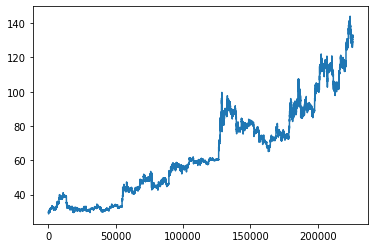

In [11]:
plot(datamatrix.close);

In [12]:
#datamatrix.dump_tsys("data.tsys")

In [13]:
datalen = len(datamatrix)

d_open = np.array(datamatrix.open)
d_high = np.array(datamatrix.high)
d_low = np.array(datamatrix.low)
d_close = np.array(datamatrix.close)
d_volume = np.array(datamatrix.volume)
d_year = np.array([x.year for x in datamatrix.get_dt_list()])
d_month = np.array([x.month for x in datamatrix.get_dt_list()])
d_day = np.array([x.day for x in datamatrix.get_dt_list()])
d_hour = np.array([x.hour for x in datamatrix.get_dt_list()])
d_minute = np.array([x.minute for x in datamatrix.get_dt_list()])
d_second = np.array([x.second for x in datamatrix.get_dt_list()])

In [14]:
import datamodel_super as dm
dmodel = dm.DataModel()
dmodel.input(np.vstack([d_open, d_high, d_low, d_close, d_volume, 
                        d_year, d_month, d_day, d_hour, d_minute, d_second]))

In [15]:
dmodel.process()
nc = dmodel.cut_nans()
nc

178

In [16]:
dmodel.data.shape

(176, 225932)

In [17]:
dmodel.data[0:10, 0:5]

array([[-0.00292065, -0.00292065,  1.08397869, -0.00292065, -0.00292065],
       [-0.00299792,  1.1126601 , -0.00299792, -0.00299792, -0.00299792],
       [-0.00300286, -0.00300286,  1.11449292, -0.00300286, -0.00300286],
       [-0.00292002,  1.08374638, -0.00292002, -0.00292002, -0.00292002],
       [-0.00854464, -0.00854464,  0.44671227,  0.44671227,  0.44671227],
       [-0.00858458,  0.4486926 ,  0.4486926 ,  0.4486926 ,  0.4486926 ],
       [-0.00849339, -0.00849339,  0.44390126,  0.44390126,  0.44390126],
       [-0.00854857,  0.44666528,  0.44666528,  0.44666528,  0.44666528],
       [-0.00469459,  1.21848706,  0.51953551,  0.37365125,  0.2806277 ],
       [-0.01049742,  0.38104384,  0.38104384,  0.38104384,  0.38104384]])

In [18]:
tgt = np.vstack([d_open[nc:], 
                 d_high[nc:], 
                 d_low[nc:], 
                 d_close[nc:]])
tgt.shape

(4, 225932)

In [19]:
tgt[:, 0:5]

array([[28.97, 28.97, 29.14, 29.14, 29.14],
       [28.97, 29.14, 29.14, 29.14, 29.14],
       [28.97, 28.97, 29.14, 29.14, 29.14],
       [28.97, 29.14, 29.14, 29.14, 29.14]])

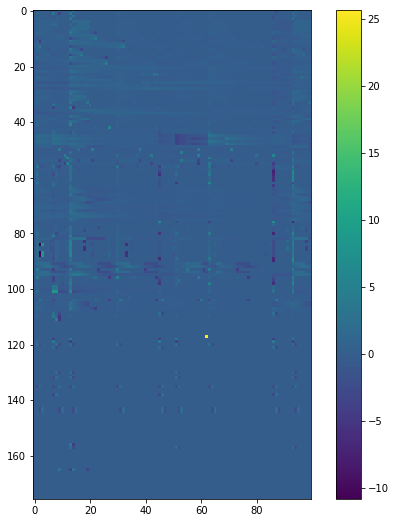

In [20]:
figure(figsize(9,9));
imshow(dmodel.data[:, 0:100]); colorbar();

In [21]:
np.save(open("data_ltc_1m_2019.npy",'wb'), dmodel.data)
np.save(open("data_ltc_1m_2019_targets.npy",'wb'), tgt)

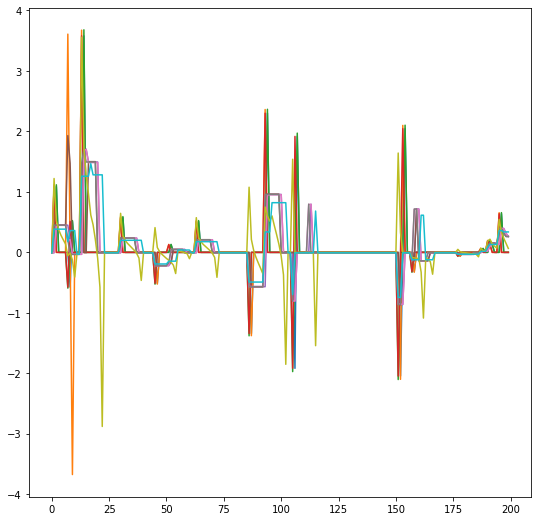

In [22]:
plot(dmodel.data.T[0:200, 0:10]);

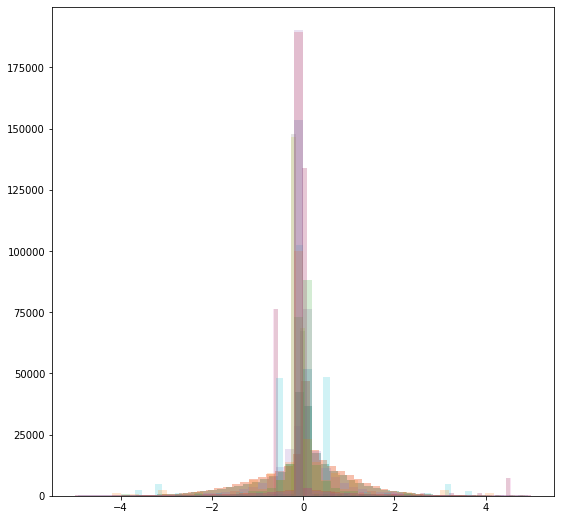

In [23]:
for i in list(range(dmodel.data.shape[0]))[45:60]:
    a = dmodel.data[i]
    a = a[where((a > -5) & (a < 5) )]
    hist(a, 50, alpha=0.2);

In [24]:
mean(a)

-0.0031671400999646222